# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the MIND validation dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Mean Reciprocal Rank (MRR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to fianl rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t

Local code:

In [8]:
from poprox_recommender.eval_tables import EvalTable
from IPython.display import HTML

### 1. 2 Loading Data

In [9]:
mind_val_user_metrics = pd.read_csv('../outputs/mind-val-user-metrics.csv.gz')
mind_val_user_metrics.head()

,user_id,recommender,NDCG@5,NDCG@10,MRR,RBO@5,RBO@10,personalized
0,bf5bb199-a039-5d82-812b-a7f69df5788a,nrms,1.00000,1.00000,0.500000,0.409510,0.651322,True
1,bf5bb199-a039-5d82-812b-a7f69df5788a,mmr,0.63093,0.63093,0.333333,0.337510,0.501731,True
2,bf5bb199-a039-5d82-812b-a7f69df5788a,pfar,1.00000,1.00000,0.500000,0.409510,0.651322,True
3,bf5bb199-a039-5d82-812b-a7f69df5788a,topic-cali,1.00000,1.00000,0.500000,0.409510,0.651322,True
4,bf5bb199-a039-5d82-812b-a7f69df5788a,softmax,1.00000,1.00000,1.000000,0.232938,0.435088,True


In [10]:
metrics = ['NDCG@5', 'NDCG@10', 'MRR', 'RBO@5', 'RBO@10']

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG@5 shows how well the top 5 recommendations match user preferences, while NDCG@10 looks at the top 10. Comparing them helps us see how performance changes with longer recommendation lists. Likewise, MRR evaluates how quickly the most relevant item appears in the recommendations.

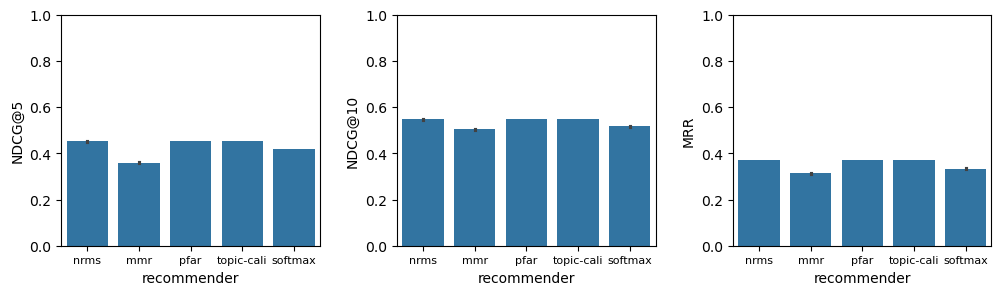

In [11]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(metrics[:3], 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_val_user_metrics, x='recommender', y=metric)
    plt.xticks(fontsize=8)
    plt.ylim(0, 1)
    
plt.show()

The summary tables show the mean values and 95% confidence intervals for effectiveness metrics across recommenders.

In [12]:
for metric in metrics[:3]:
    tw = EvalTable(mind_val_user_metrics, 'recommender', metric)
    tw.add_stat('Mean', np.mean, ci=True)
    #tw.add_quantiles(['10%ile', 'Median', '90%ile'], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

KeyboardInterrupt: 

### 2. 2 Ranking Overlap Metrics
Define RBO: RBO@5 measures the overlap between the top 5 recommendations and the final rankings, while RBO@10 measures for the top 10. Comparing them shows how consistency changes with longer lists. 

In [ ]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(metrics[3:], 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_val_user_metrics, x='recommender', y=metric)
    plt.title(metric)
    plt.xticks(fontsize=8)
    plt.ylim(0, 1)

plt.show()

The summary tables show the mean values and 95% confidence intervals for ranking overlap metrics across recommenders.

In [ ]:
for metric in metrics[3:]:
    tw = EvalTable(mind_val_user_metrics, 'recommender', metric)
    tw.add_stat('Mean', np.mean, ci=True)
    #tw.add_quantiles(['10%ile', 'Median', '90%ile'], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))